In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fruits' dataset.
Path to dataset files: /kaggle/input/fruits


In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [26]:
files = os.listdir(path)

In [27]:
Path = os.path.join(path,files[3])
Path

'/kaggle/input/fruits/fruits-360_original-size'

In [28]:
Path = os.path.join(Path,os.listdir(Path)[0])
Path

'/kaggle/input/fruits/fruits-360_original-size/fruits-360-original-size'

In [29]:
os.listdir(Path)

['Papers', 'LICENSE', 'Validation', 'Training', 'README.md', 'Test']

In [34]:
train = os.path.join(Path,os.listdir(Path)[3])
test = os.path.join(Path,os.listdir(Path)[5])

In [35]:
train

'/kaggle/input/fruits/fruits-360_original-size/fruits-360-original-size/Training'

In [36]:
test

'/kaggle/input/fruits/fruits-360_original-size/fruits-360-original-size/Test'

In [37]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range= 20,
    zoom_range= 0.2,
    horizontal_flip= True
    )
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    train,target_size = (100,100), batch_size = 32, class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test, target_size = (100,100), batch_size = 32, class_mode = 'categorical'
)



Found 33723 images belonging to 100 classes.
Found 16763 images belonging to 100 classes.


In [38]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape = (100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
past = model.fit(
    train_generator,
    epochs = 3,
    validation_data = test_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 857s 811ms/step - accuracy: 0.1760 - loss: 3.3607 - val_accuracy: 0.8186 - val_loss: 0.6618
Epoch 2/3
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 807s 765ms/step - accuracy: 0.5399 - loss: 1.3679 - val_accuracy: 0.8485 - val_loss: 0.4579
Epoch 3/3
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 800s 759ms/step - accuracy: 0.6393 - loss: 1.0365 - val_accuracy: 0.8852 - val_loss: 0.3535


In [41]:
loss,accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy: .3f}')

524/524 ━━━━━━━━━━━━━━━━━━━━ 105s 200ms/step - accuracy: 0.8864 - loss: 0.3487
Test Accuracy:  0.885


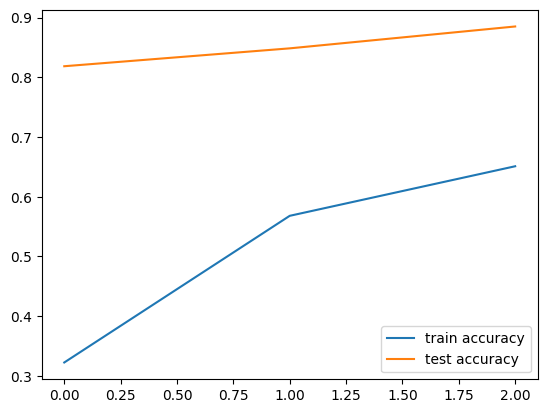

In [43]:
plt.plot(past.history['accuracy'],label = 'train accuracy')
plt.plot(past.history['val_accuracy'],label = 'test accuracy')
plt.legend()
plt.show()

In [44]:
model.save('FSV_Classifier.h5')